In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

random.seed(100)

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

import cufflinks as cf
cf.go_offline()

3.10.0


In [3]:
### Data Preprocessing ###

dataset = pd.read_csv('1_EmployeeInformation.csv',parse_dates=['Date_Started','Date_Terminated'])

In [4]:
dataset_Economy = pd.read_csv('united-states-economy_data.csv',parse_dates=['Year'])
dataset_Economy['Year']=dataset_Economy['Year'].dt.year
dataset_Economy.head() 

,Year,US_Unemployment_rate,US_Personal_income_per_capita,US_State_Minimum_Wage_Rate_IN,US_Average_ Hourly_Earnings _Employees
0,1991,6.80,20056,3.35,10.51
1,1992,7.50,21099,3.35,10.77
2,1993,6.90,21738,3.35,11.04
3,1994,6.12,22574,3.35,11.34
4,1995,5.65,23600,3.35,11.65


In [5]:
dataset.columns

Index(['Employee_EIN', 'Employee_Id', 'Age', 'Gender', 'Ethnicity', 'County',
       'Zip_Code', 'Default_Shift_Abbrev.', 'Date_Started', 'Date_Terminated',
       'Hourly_Pay', 'Reason', 'Supervisor_Name', 'Pay_Type',
       'Employee_Status', 'EEO_Classification', 'SOC_Code',
       'Cost_Centers(Department)', 'Operations(Department)'],
      dtype='object')

In [6]:
dataset.head(4)

,Employee_EIN,Employee_Id,Age,Gender,Ethnicity,County,Zip_Code,Default_Shift_Abbrev.,Date_Started,Date_Terminated,Hourly_Pay,Reason,Supervisor_Name,Pay_Type,Employee_Status,EEO_Classification,SOC_Code,Cost_Centers(Department),Operations(Department)
0,IP Corp (Default),177,57.0,M,White (not Hispanic or Latino),Carroll,46929,1.0,1991-03-18,NaT,$17.66,NaN,William A. Rhoades (IP Corp (Default)),Hourly,Active,Operatives,513023,30-Smoke-Pickle-Wash,30-Smoke-Pickle-Wash
1,IP Corp (Default),211,59.0,M,White (not Hispanic or Latino),Carroll,46923,1.0,1991-04-01,NaT,$33.48,NaN,Thor E. Spalsbury (IP Corp (Default)),Hourly,Active,Craft Workers,499041,Maintenance,NaN
2,IP Corp (Default),230,56.0,F,White (not Hispanic or Latino),Carroll,46923,1.0,1991-04-05,NaT,$17.15,NaN,William A. Rhoades (IP Corp (Default)),Hourly,Active,Operatives,513023,33-Bacon,33-Bacon
3,IP Corp (Default),245,58.0,F,White (not Hispanic or Latino),Carroll,46913,1.0,2001-04-23,NaT,$16.63,NaN,Kimberly D. Bradley (IP Corp (Default)),Hourly,Active,Operatives,372011,68-Showcase,68-Showcase


In [7]:
dataset1=dataset[dataset['Employee_Status']=='Terminated']

In [8]:
dataset['Date_Started_Year']=dataset['Date_Started'].dt.year
dataset['Date_Started_Month']=dataset['Date_Started'].dt.month
dataset['Date_Started_Day']=dataset['Date_Started'].dt.day

In [9]:
dataset=pd.merge(dataset, dataset_Economy, how='left', right_on='Year', left_on='Date_Started_Year')

dataset=dataset.drop(columns=['Year'])


In [10]:
dataset.columns

Index(['Employee_EIN', 'Employee_Id', 'Age', 'Gender', 'Ethnicity', 'County',
       'Zip_Code', 'Default_Shift_Abbrev.', 'Date_Started', 'Date_Terminated',
       'Hourly_Pay', 'Reason', 'Supervisor_Name', 'Pay_Type',
       'Employee_Status', 'EEO_Classification', 'SOC_Code',
       'Cost_Centers(Department)', 'Operations(Department)',
       'Date_Started_Year', 'Date_Started_Month', 'Date_Started_Day',
       'US_Unemployment_rate', 'US_Personal_income_per_capita',
       'US_State_Minimum_Wage_Rate_IN',
       'US_Average_ Hourly_Earnings _Employees'],
      dtype='object')

In [11]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset['Date_Started_Year'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [12]:
dataset['Date_Started_Month'].iplot(kind='hist')

In [13]:
dataset1['Date_Terminated_Year']=dataset['Date_Terminated'].dt.year
dataset1['Date_Terminated_Month']=dataset['Date_Terminated'].dt.month

In [14]:
plt.figure(figsize=(12,6))
sns.set_style('white')


dataset1['Date_Terminated_Year'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [15]:
plt.figure(figsize=(12,6))
sns.set_style('white')
dataset1['Date_Terminated_Month'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [16]:
dataset1['Worked_Days']=dataset['Date_Terminated']-dataset['Date_Started']
dataset1['Worked_Days'].max()
dataset1['Worked_Days'].min()

Timedelta('0 days 00:00:00')

In [17]:
plt.figure(figsize=(12,8))
sns.set_style('white')



dataset1['Reason'].iplot(kind='hist')


<Figure size 864x576 with 0 Axes>

In [18]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Age'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [19]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Gender'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [20]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Ethnicity'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [21]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['County'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [22]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Default_Shift_Abbrev.'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [23]:
plt.figure(figsize=(12,6))
sns.set_style('white')

#sns.countplot(x='Hourly_Pay',data=dataset)


dataset1['Hourly_Pay'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [24]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Supervisor_Name'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [25]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['EEO_Classification'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [26]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Pay_Type'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [27]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['SOC_Code'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [28]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Cost_Centers(Department)'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [29]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Operations(Department)'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [30]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dataset1['Zip_Code'].iplot(kind='hist')

<Figure size 864x432 with 0 Axes>

In [31]:
dataset.columns

Index(['Employee_EIN', 'Employee_Id', 'Age', 'Gender', 'Ethnicity', 'County',
       'Zip_Code', 'Default_Shift_Abbrev.', 'Date_Started', 'Date_Terminated',
       'Hourly_Pay', 'Reason', 'Supervisor_Name', 'Pay_Type',
       'Employee_Status', 'EEO_Classification', 'SOC_Code',
       'Cost_Centers(Department)', 'Operations(Department)',
       'Date_Started_Year', 'Date_Started_Month', 'Date_Started_Day',
       'US_Unemployment_rate', 'US_Personal_income_per_capita',
       'US_State_Minimum_Wage_Rate_IN',
       'US_Average_ Hourly_Earnings _Employees'],
      dtype='object')

In [32]:
dataset.head(10)

,Employee_EIN,Employee_Id,Age,Gender,Ethnicity,County,Zip_Code,Default_Shift_Abbrev.,Date_Started,Date_Terminated,...,SOC_Code,Cost_Centers(Department),Operations(Department),Date_Started_Year,Date_Started_Month,Date_Started_Day,US_Unemployment_rate,US_Personal_income_per_capita,US_State_Minimum_Wage_Rate_IN,US_Average_ Hourly_Earnings _Employees
0,IP Corp (Default),177,57.0,M,White (not Hispanic or Latino),Carroll,46929,1.0,1991-03-18,NaT,...,513023,30-Smoke-Pickle-Wash,30-Smoke-Pickle-Wash,1991,3,18,6.80,20056,3.35,10.51
1,IP Corp (Default),211,59.0,M,White (not Hispanic or Latino),Carroll,46923,1.0,1991-04-01,NaT,...,499041,Maintenance,NaN,1991,4,1,6.80,20056,3.35,10.51
2,IP Corp (Default),230,56.0,F,White (not Hispanic or Latino),Carroll,46923,1.0,1991-04-05,NaT,...,513023,33-Bacon,33-Bacon,1991,4,5,6.80,20056,3.35,10.51
3,IP Corp (Default),245,58.0,F,White (not Hispanic or Latino),Carroll,46913,1.0,2001-04-23,NaT,...,372011,68-Showcase,68-Showcase,2001,4,23,4.73,31574,5.15,14.54
4,IP Corp (Default),304,56.0,F,Asian (not Hispanic or Latino),White,47923,1.0,1991-05-13,NaT,...,513023,33-Bacon,33-Bacon,1991,5,13,6.80,20056,3.35,10.51
5,IP Corp (Default),383,49.0,M,White (not Hispanic or Latino),Clinton,46058,1.0,1991-06-17,NaT,...,499041,Maintenance,NaN,1991,6,17,6.80,20056,3.35,10.51
6,IP Corp (Default),387,62.0,F,White (not Hispanic or Latino),Carroll,46923,1.0,1997-12-01,NaT,...,499098,64-Supply/Receiving,64-Supply,1997,12,1,5.00,25984,3.35,12.50
7,IP Corp (Default),585,62.0,M,White (not Hispanic or Latino),Carroll,46929,1.0,1991-10-19,2019-07-01,...,519199,01-Livestock,01-Livestock,1991,10,19,6.80,20056,3.35,10.51
8,IP Corp (Default),599,60.0,M,White (not Hispanic or Latino),White,47959,1.0,2019-01-21,2019-07-17,...,513023,07-Offal,07-Offal,2019,1,21,3.60,56621,7.25,23.51
9,IP Corp (Default),602,63.0,F,NaN,Carroll,46923,1.0,1991-10-28,2019-01-03,...,372011,Showcase,NaN,1991,10,28,6.80,20056,3.35,10.51


In [33]:
dataset['Hourly_Pay']=dataset['Hourly_Pay'].str.replace('$','')
dataset['Hourly_Pay']=dataset['Hourly_Pay'].str.replace('-','')
dataset['Hourly_Pay']=pd.to_numeric(dataset['Hourly_Pay'])

dataset.head()

,Employee_EIN,Employee_Id,Age,Gender,Ethnicity,County,Zip_Code,Default_Shift_Abbrev.,Date_Started,Date_Terminated,...,SOC_Code,Cost_Centers(Department),Operations(Department),Date_Started_Year,Date_Started_Month,Date_Started_Day,US_Unemployment_rate,US_Personal_income_per_capita,US_State_Minimum_Wage_Rate_IN,US_Average_ Hourly_Earnings _Employees
0,IP Corp (Default),177,57.0,M,White (not Hispanic or Latino),Carroll,46929,1.0,1991-03-18,NaT,...,513023,30-Smoke-Pickle-Wash,30-Smoke-Pickle-Wash,1991,3,18,6.80,20056,3.35,10.51
1,IP Corp (Default),211,59.0,M,White (not Hispanic or Latino),Carroll,46923,1.0,1991-04-01,NaT,...,499041,Maintenance,NaN,1991,4,1,6.80,20056,3.35,10.51
2,IP Corp (Default),230,56.0,F,White (not Hispanic or Latino),Carroll,46923,1.0,1991-04-05,NaT,...,513023,33-Bacon,33-Bacon,1991,4,5,6.80,20056,3.35,10.51
3,IP Corp (Default),245,58.0,F,White (not Hispanic or Latino),Carroll,46913,1.0,2001-04-23,NaT,...,372011,68-Showcase,68-Showcase,2001,4,23,4.73,31574,5.15,14.54
4,IP Corp (Default),304,56.0,F,Asian (not Hispanic or Latino),White,47923,1.0,1991-05-13,NaT,...,513023,33-Bacon,33-Bacon,1991,5,13,6.80,20056,3.35,10.51


In [34]:
#dataset['Zip_Code']=dataset['Zip_Code'].str.replace('47905-4523','47905')

#dataset['Zip_Code']=pd.to_numeric(dataset['Zip_Code'])

In [35]:
def label_fix2(label):
    if label=='Active':
        return 0    
    else: 
        return 1
dataset['Employee_Status'] = dataset['Employee_Status'].apply(label_fix2)

In [36]:
dataset.columns


Index(['Employee_EIN', 'Employee_Id', 'Age', 'Gender', 'Ethnicity', 'County',
       'Zip_Code', 'Default_Shift_Abbrev.', 'Date_Started', 'Date_Terminated',
       'Hourly_Pay', 'Reason', 'Supervisor_Name', 'Pay_Type',
       'Employee_Status', 'EEO_Classification', 'SOC_Code',
       'Cost_Centers(Department)', 'Operations(Department)',
       'Date_Started_Year', 'Date_Started_Month', 'Date_Started_Day',
       'US_Unemployment_rate', 'US_Personal_income_per_capita',
       'US_State_Minimum_Wage_Rate_IN',
       'US_Average_ Hourly_Earnings _Employees'],
      dtype='object')

In [37]:
dataset.nunique()

Employee_EIN                                 1
Employee_Id                               5322
Age                                         61
Gender                                       3
Ethnicity                                    8
County                                      87
Zip_Code                                   279
Default_Shift_Abbrev.                        3
Date_Started                               850
Date_Terminated                            291
Hourly_Pay                                  92
Reason                                      32
Supervisor_Name                            109
Pay_Type                                     1
Employee_Status                              2
EEO_Classification                           7
SOC_Code                                    34
Cost_Centers(Department)                    37
Operations(Department)                      22
Date_Started_Year                           30
Date_Started_Month                          12
Date_Started_

In [38]:
dataset['Gender'].value_counts()

M    3529
F    1912
U      11
Name: Gender, dtype: int64

In [39]:
dataset['Gender']=dataset['Gender'].dropna()


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5453 entries, 0 to 5452
Data columns (total 26 columns):
Employee_EIN                              5453 non-null object
Employee_Id                               5453 non-null int64
Age                                       5452 non-null float64
Gender                                    5452 non-null object
Ethnicity                                 4765 non-null object
County                                    5420 non-null object
Zip_Code                                  5453 non-null object
Default_Shift_Abbrev.                     5119 non-null float64
Date_Started                              5453 non-null datetime64[ns]
Date_Terminated                           3221 non-null datetime64[ns]
Hourly_Pay                                5095 non-null float64
Reason                                    2791 non-null object
Supervisor_Name                           5396 non-null object
Pay_Type                                  5453 non-null 

In [41]:
dataset.describe()

,Employee_Id,Age,Default_Shift_Abbrev.,Hourly_Pay,Employee_Status,Date_Started_Year,Date_Started_Month,Date_Started_Day,US_Unemployment_rate,US_Personal_income_per_capita,US_State_Minimum_Wage_Rate_IN,US_Average_ Hourly_Earnings _Employees
count,5453.000000,5452.000000,5119.000000,5095.000000,5453.000000,5453.000000,5453.000000,5453.000000,5453.000000,5453.000000,5453.000000,5453.000000
mean,38636.761966,33.872524,1.598945,16.903482,0.590684,2017.045113,6.841372,15.715019,4.259373,53361.338529,7.098084,22.429138
std,9772.109370,12.116647,0.548833,1.976126,0.491753,4.537585,3.607428,8.671759,1.356417,6749.325328,0.658860,2.282632
min,177.000000,18.000000,1.000000,0.010000,0.000000,1991.000000,1.000000,1.000000,3.550000,20056.000000,3.350000,10.510000
25%,35853.000000,24.000000,1.000000,16.220000,0.000000,2017.000000,4.000000,8.000000,3.600000,51900.000000,7.250000,22.050000
50%,40347.000000,31.000000,2.000000,16.480000,1.000000,2019.000000,7.000000,16.000000,3.600000,56621.000000,7.250000,23.510000
75%,46214.000000,42.000000,2.000000,17.000000,1.000000,2019.000000,10.000000,23.000000,3.990000,56621.000000,7.250000,23.510000
max,110761.000000,81.000000,3.000000,37.080000,1.000000,2020.000000,12.000000,31.000000,9.630000,58823.000000,7.250000,24.070000


C:\Users\caiyi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in greater

C:\Users\caiyi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in less

C:\Users\caiyi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\caiyi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



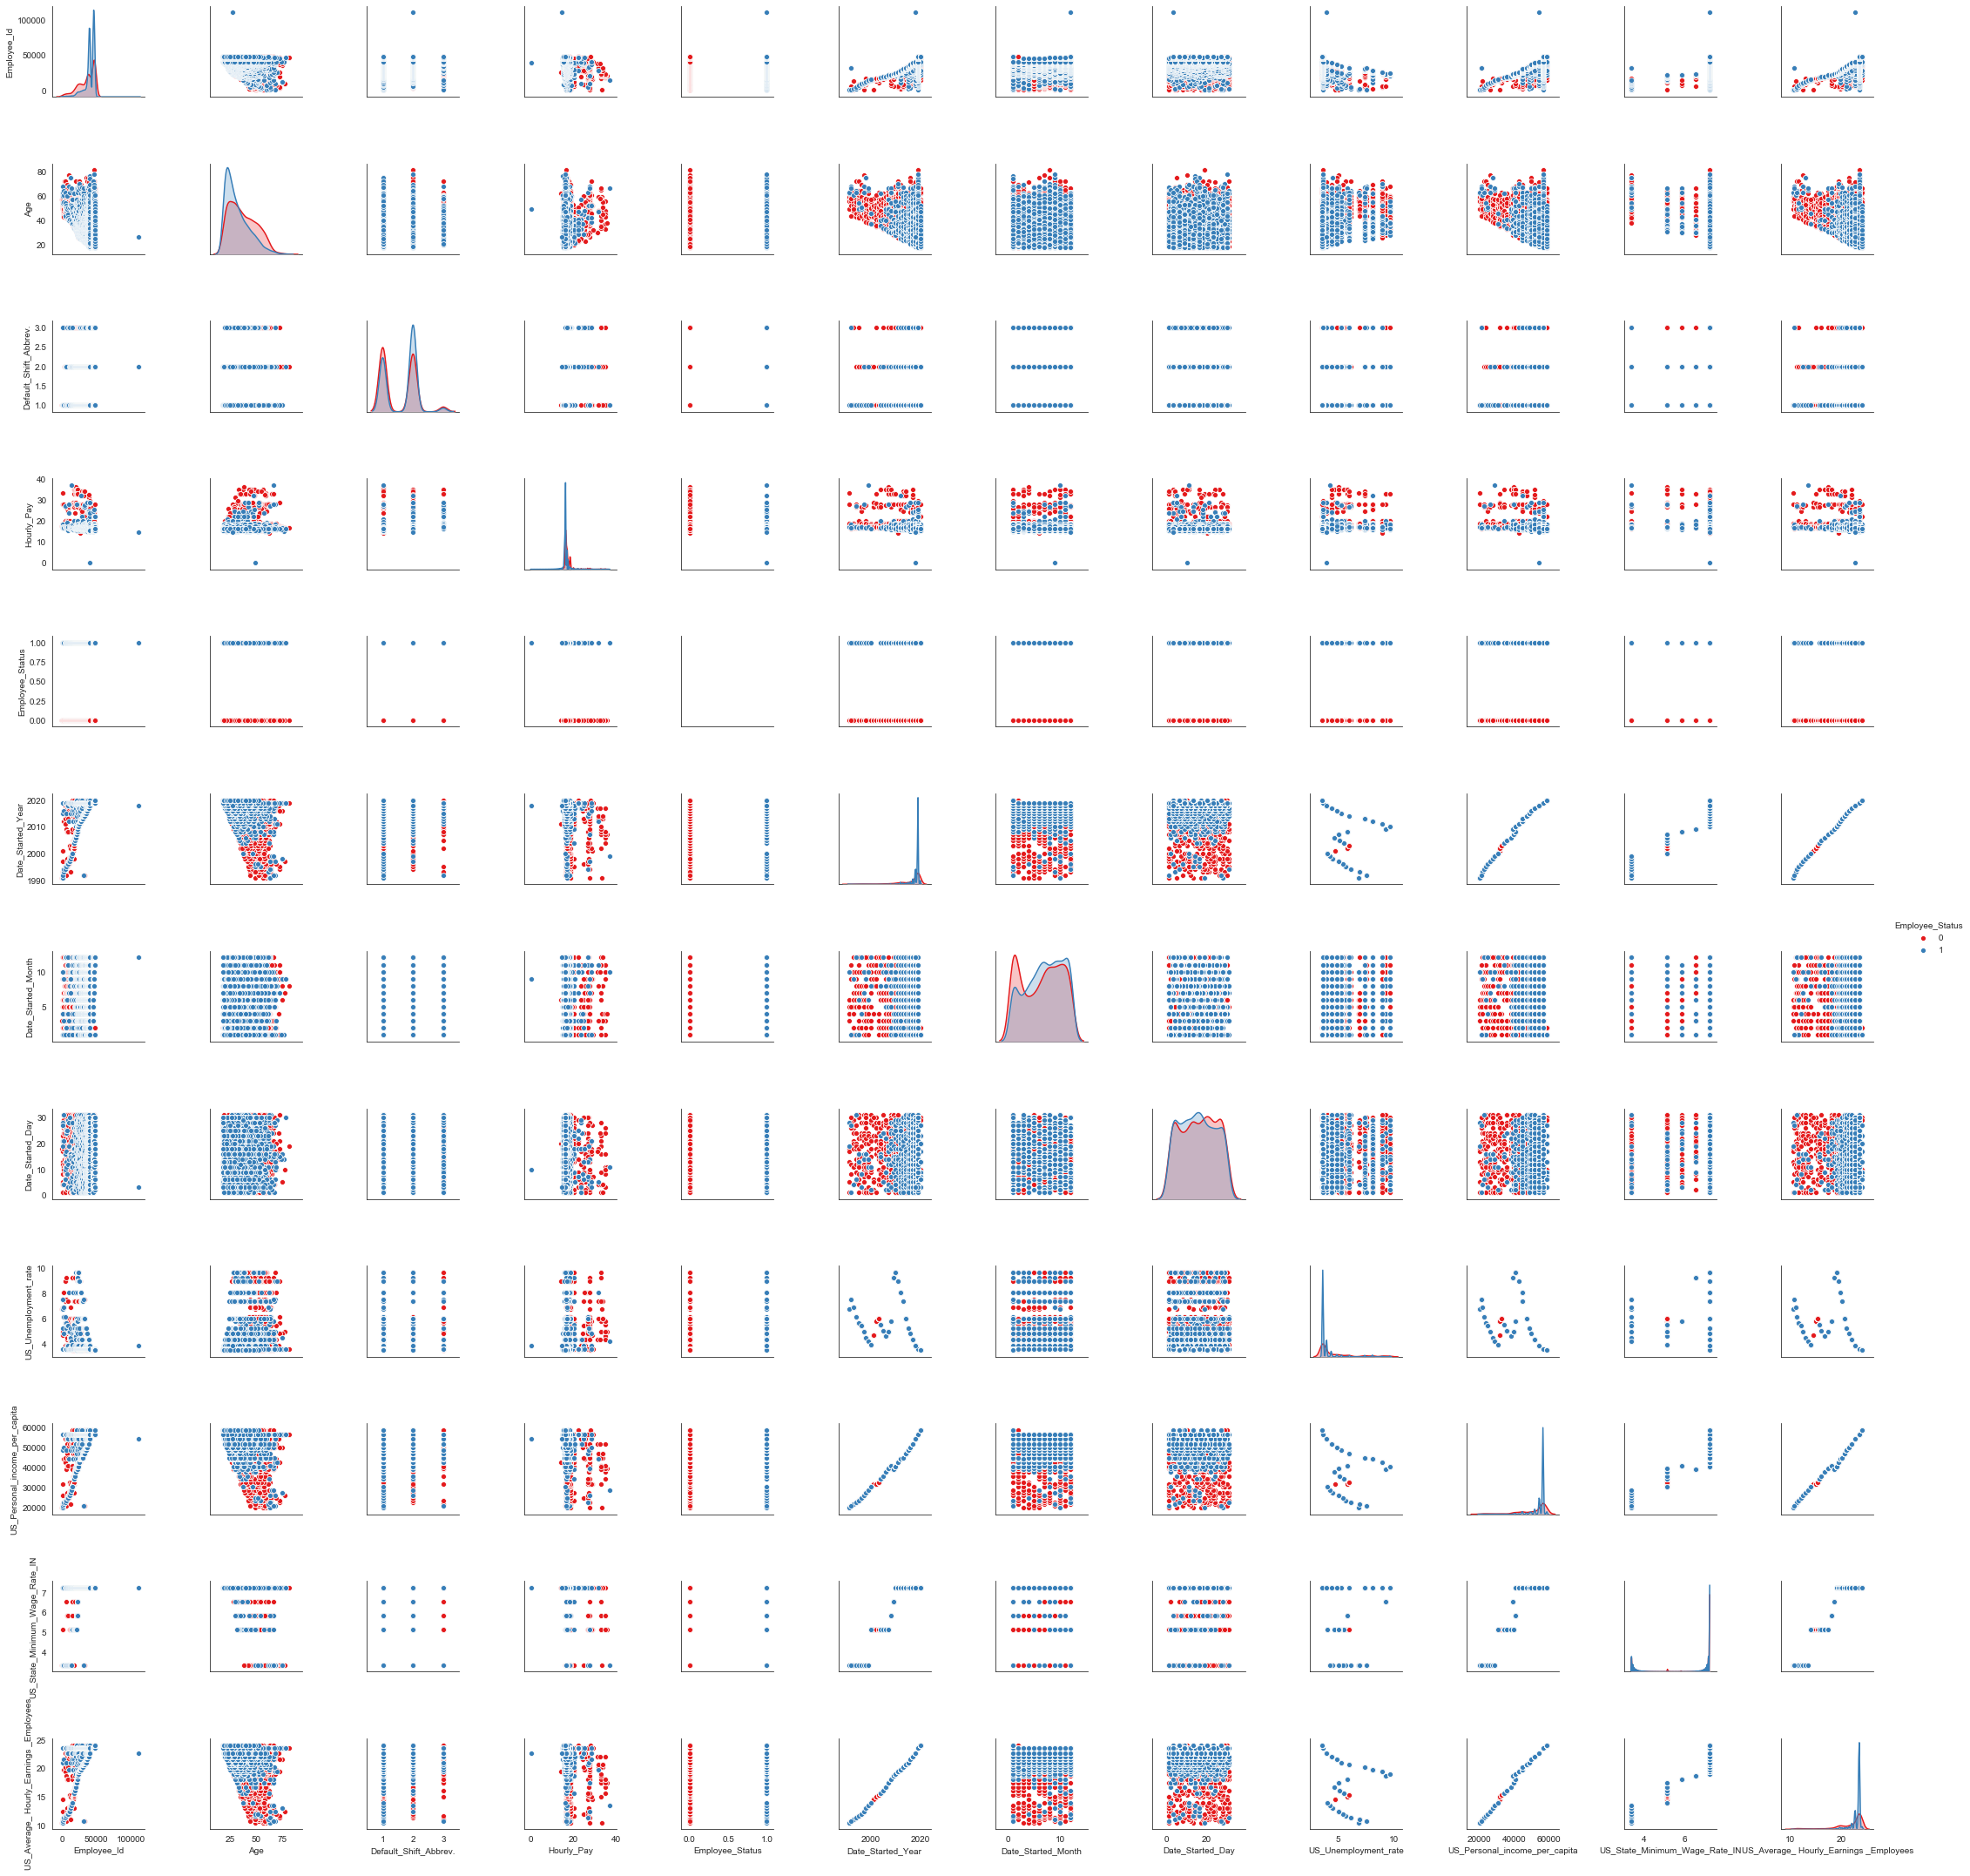

In [42]:
sns.pairplot(dataset,hue='Employee_Status',palette='Set1')

In [43]:
## Cleaning Data

# Removing NaN
dataset.isna().any() # No NAs

Employee_EIN                              False
Employee_Id                               False
Age                                        True
Gender                                     True
Ethnicity                                  True
County                                     True
Zip_Code                                  False
Default_Shift_Abbrev.                      True
Date_Started                              False
Date_Terminated                            True
Hourly_Pay                                 True
Reason                                     True
Supervisor_Name                            True
Pay_Type                                  False
Employee_Status                           False
EEO_Classification                         True
SOC_Code                                   True
Cost_Centers(Department)                   True
Operations(Department)                     True
Date_Started_Year                         False
Date_Started_Month                      

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5453 entries, 0 to 5452
Data columns (total 26 columns):
Employee_EIN                              5453 non-null object
Employee_Id                               5453 non-null int64
Age                                       5452 non-null float64
Gender                                    5452 non-null object
Ethnicity                                 4765 non-null object
County                                    5420 non-null object
Zip_Code                                  5453 non-null object
Default_Shift_Abbrev.                     5119 non-null float64
Date_Started                              5453 non-null datetime64[ns]
Date_Terminated                           3221 non-null datetime64[ns]
Hourly_Pay                                5095 non-null float64
Reason                                    2791 non-null object
Supervisor_Name                           5396 non-null object
Pay_Type                                  5453 non-null 

C:\Users\caiyi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\caiyi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal



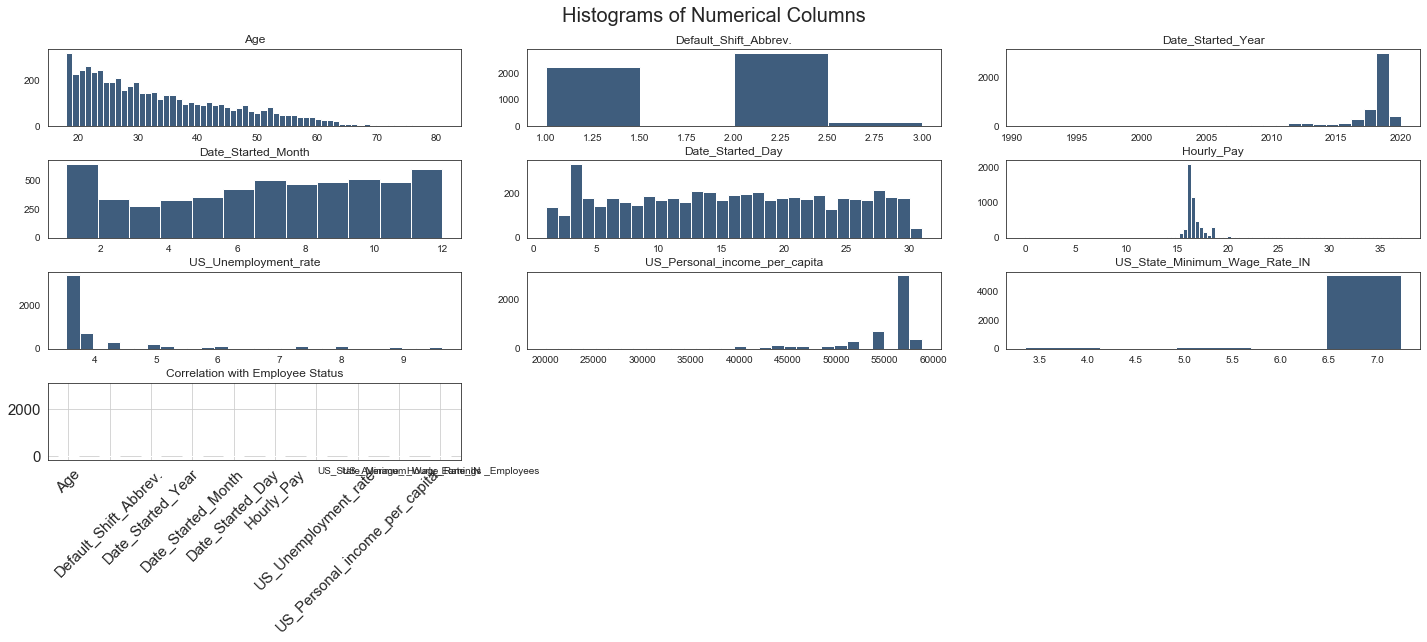

In [45]:
## Histograms

#dataset3 = dataset.drop(columns = ['Employee_EIN','Zip_Code',Employee_Id','Pay_Type','Date_Started','Date_Terminated','Reason','Employee_Status'])
dataset2=dataset[['Age','Default_Shift_Abbrev.','Date_Started_Year','Date_Started_Month','Date_Started_Day','Hourly_Pay','US_Unemployment_rate', 'US_Personal_income_per_capita',
       'US_State_Minimum_Wage_Rate_IN','US_Average_ Hourly_Earnings _Employees']]

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


## Correlation with Response Variable (Note: Models like RF are not linear like these)

dataset2.corrwith(dataset.Employee_Status).plot.bar(
        figsize = (20, 10), title = "Correlation with Employee Status", fontsize = 15,
        rot = 45, grid = True)

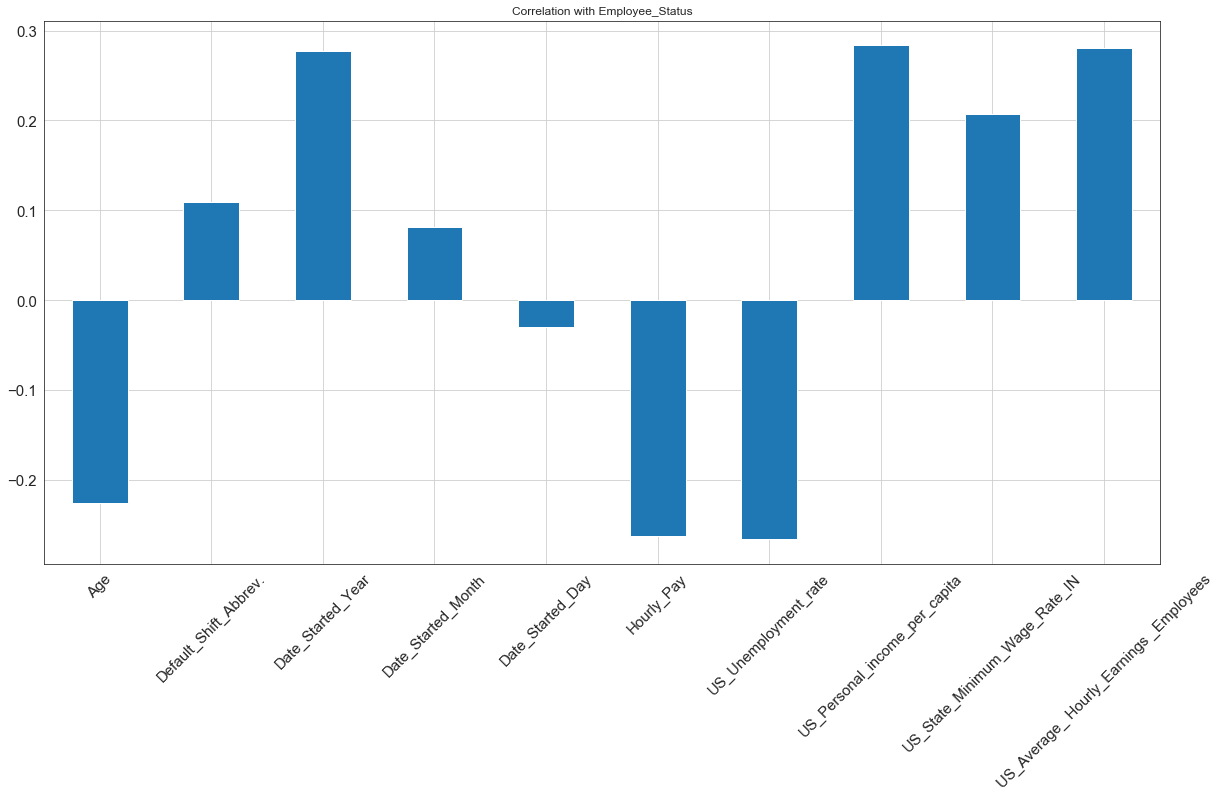

In [46]:
## Correlation with Response Variable (Note: Models like RF are not linear like these)

dataset2.corrwith(dataset.Employee_Status).plot.bar(
        figsize = (20, 10), title = "Correlation with Employee_Status", fontsize = 15,
        rot = 45, grid = True)

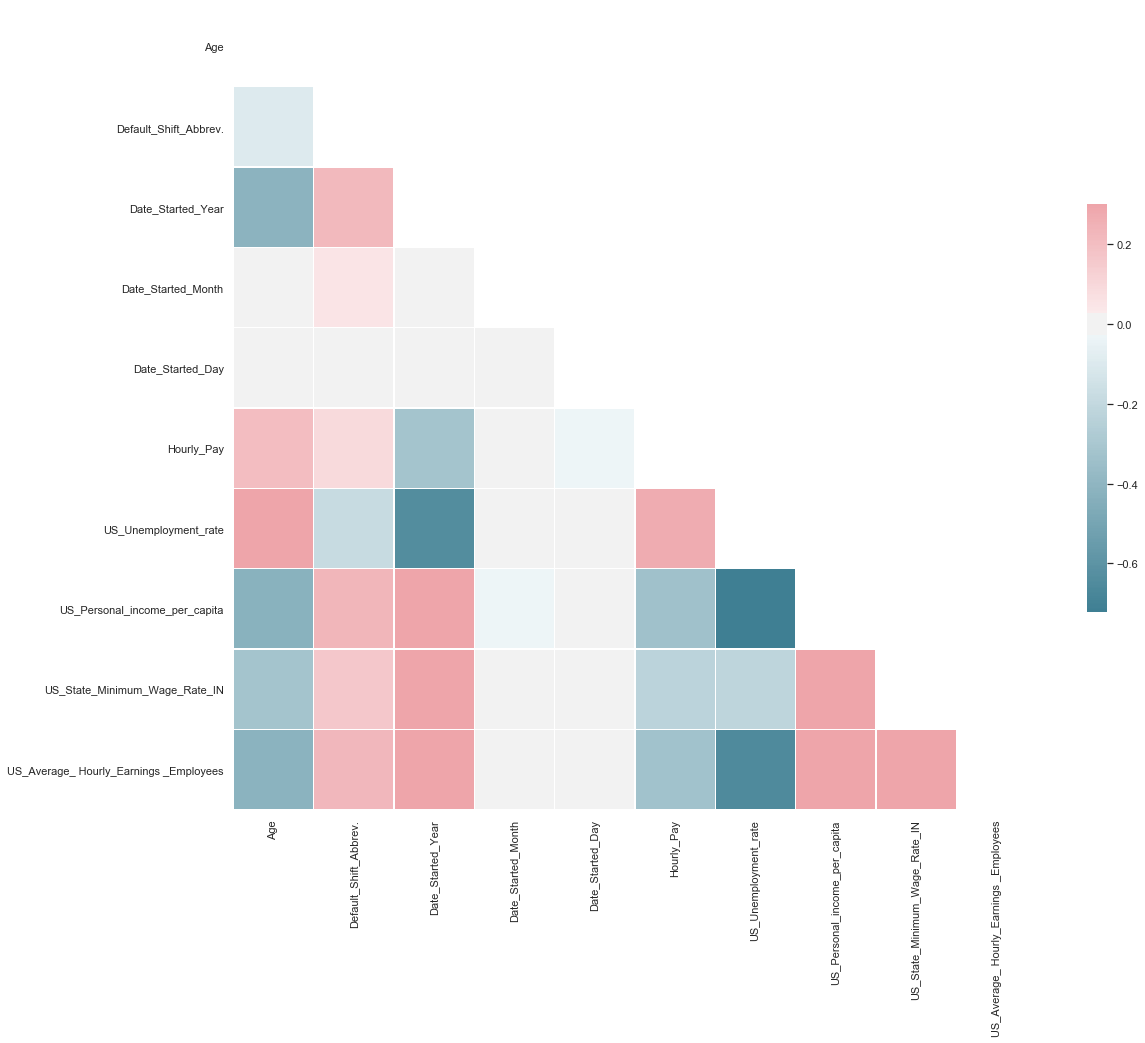

In [47]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


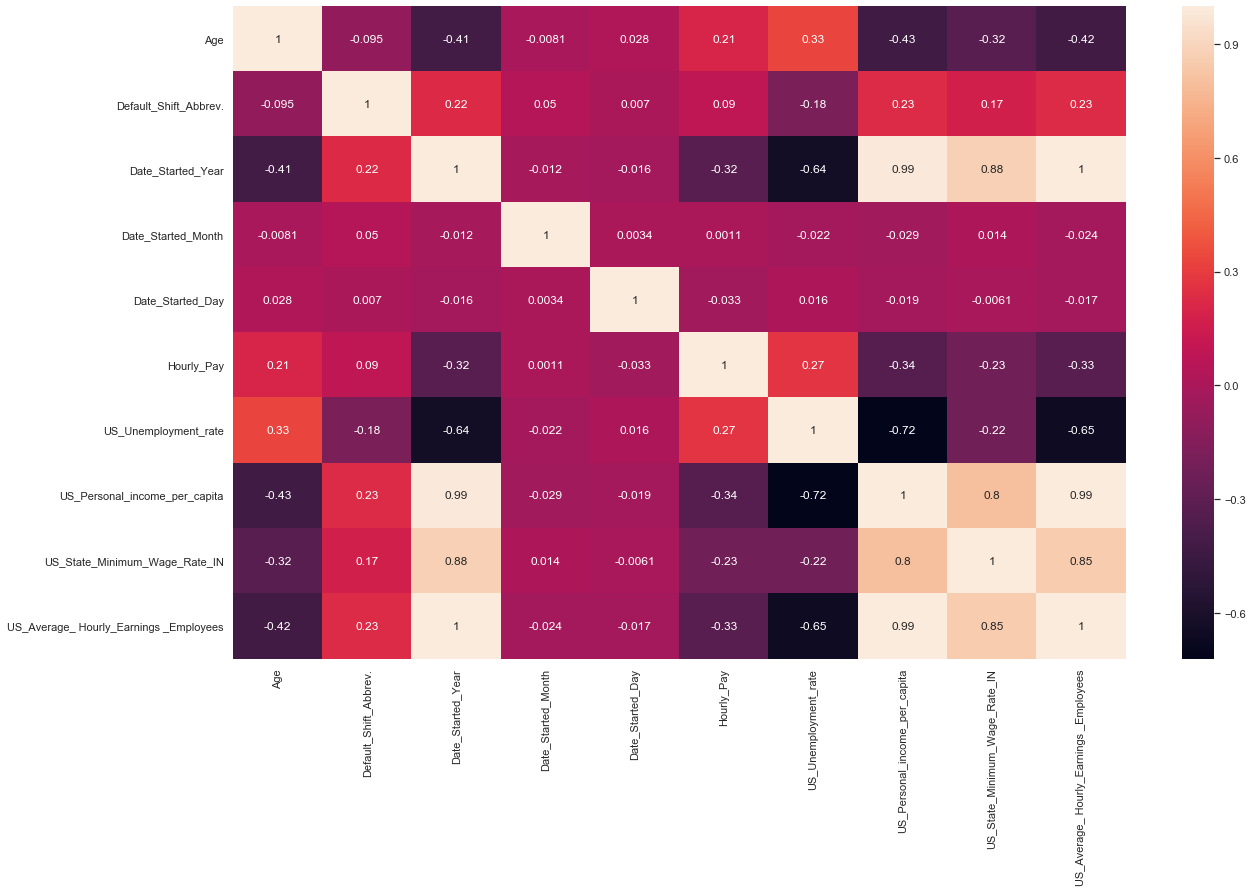

In [48]:
plt.figure(figsize=(20,12))

sns.heatmap(corr,annot=True,Cmap='coolwarm')

In [49]:
# Feature Engineering

#dataset = dataset.drop(columns = ['months_employed'])
#dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))


In [50]:
dataset3 = dataset.drop(columns = ['Employee_EIN','Zip_Code','Pay_Type','Date_Started','Date_Terminated','Reason'])
dataset3=dataset3.dropna()

In [51]:
dataset3.isna().any()

Employee_Id                               False
Age                                       False
Gender                                    False
Ethnicity                                 False
County                                    False
Default_Shift_Abbrev.                     False
Hourly_Pay                                False
Supervisor_Name                           False
Employee_Status                           False
EEO_Classification                        False
SOC_Code                                  False
Cost_Centers(Department)                  False
Operations(Department)                    False
Date_Started_Year                         False
Date_Started_Month                        False
Date_Started_Day                          False
US_Unemployment_rate                      False
US_Personal_income_per_capita             False
US_State_Minimum_Wage_Rate_IN             False
US_Average_ Hourly_Earnings _Employees    False
dtype: bool

In [52]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4273 entries, 0 to 5452
Data columns (total 20 columns):
Employee_Id                               4273 non-null int64
Age                                       4273 non-null float64
Gender                                    4273 non-null object
Ethnicity                                 4273 non-null object
County                                    4273 non-null object
Default_Shift_Abbrev.                     4273 non-null float64
Hourly_Pay                                4273 non-null float64
Supervisor_Name                           4273 non-null object
Employee_Status                           4273 non-null int64
EEO_Classification                        4273 non-null object
SOC_Code                                  4273 non-null object
Cost_Centers(Department)                  4273 non-null object
Operations(Department)                    4273 non-null object
Date_Started_Year                         4273 non-null int64
Date_Starte

In [53]:
#dataset = dataset.drop(columns = ['personal_account_m', 'personal_account_y'])

In [54]:
# One Hot Encoding
dataset = pd.get_dummies(dataset3)
dataset.columns


Index(['Employee_Id', 'Age', 'Default_Shift_Abbrev.', 'Hourly_Pay',
       'Employee_Status', 'Date_Started_Year', 'Date_Started_Month',
       'Date_Started_Day', 'US_Unemployment_rate',
       'US_Personal_income_per_capita',
       ...
       'Operations(Department)_26-Conversion',
       'Operations(Department)_30-Smoke-Pickle-Wash',
       'Operations(Department)_33-Bacon', 'Operations(Department)_56-Shipping',
       'Operations(Department)_64-Receiving',
       'Operations(Department)_64-Supply',
       'Operations(Department)_68-Showcase',
       'Operations(Department)_72-Quality Control',
       'Operations(Department)_81-Training',
       'Operations(Department)_Maintenance -Level 1'],
      dtype='object', length=238)

In [55]:
#dataset = dataset.drop(columns = ['pay_schedule_semi-monthly'])

In [56]:
# Removing extra columns
response = dataset["Employee_Status"]
#users = dataset['studentID']
dataset = dataset.drop(columns = ["Employee_Status",'Employee_Id'])

In [57]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [58]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [59]:
#### Model Building ####

### Comparing Models

## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)

C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [62]:
results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [63]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.75195,0.743261,0.830703,0.784553


In [64]:
## SVM (Linear)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

Test Data Accuracy: 0.7449


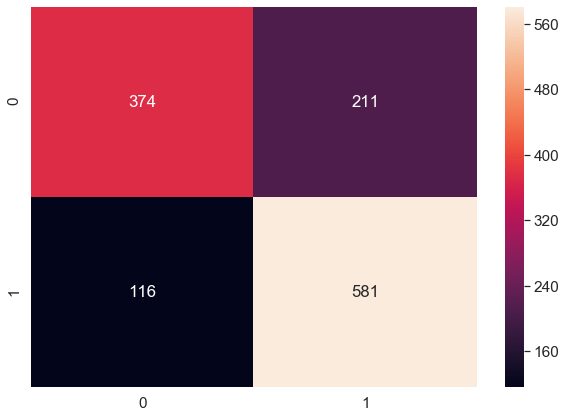

In [65]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [66]:
## SVM (rbf)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Test Data Accuracy: 0.7348


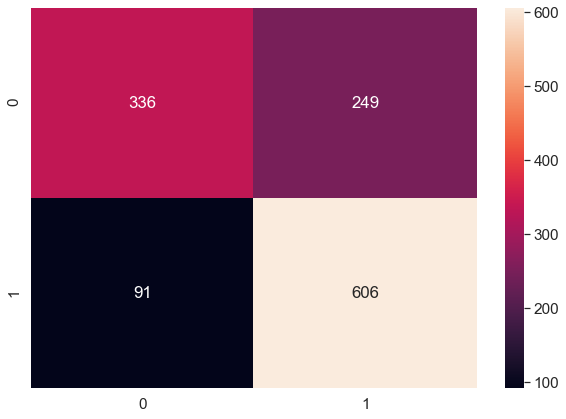

In [67]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [68]:
## RandomForest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


In [69]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.751950,0.743261,0.830703,0.784553
1,SVM (Linear),0.744930,0.733586,0.833572,0.780390
2,SVM (RBF),0.734789,0.708772,0.869440,0.780928
3,Random Forest (n=100),0.787832,0.796374,0.819225,0.807638


In [70]:
## K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.80 (+/- 0.03)


In [71]:
print(classifier.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [72]:
## Parameter Tuning
# pip install joblib
# conda install joblib

# Applying Grid Search

# Round 1: Entropy
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}


In [73]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [74]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 92.97 seconds


In [75]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.8064192577733199,
 {'bootstrap': False,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 5})

In [76]:
# Round 2: Entropy
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 34.36 seconds


In [77]:
# Round 3: Entropy
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [10, 12, 14],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 33.29 seconds


In [78]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.8017385489802742,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 12,
  'min_samples_leaf': 1,
  'min_samples_split': 10})

In [79]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [80]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.751950,0.743261,0.830703,0.784553
1,SVM (Linear),0.744930,0.733586,0.833572,0.780390
2,SVM (RBF),0.734789,0.708772,0.869440,0.780928
3,Random Forest (n=100),0.787832,0.796374,0.819225,0.807638
4,"Random Forest (n=100, GSx2 + Entropy)",0.789392,0.792066,0.830703,0.810924


In [81]:

# Round 1: Gini
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 81.74 seconds


In [82]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


(0.8084252758274825,
 {'bootstrap': False,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 5})

In [83]:
# Round 2: Gini
parameters = {"max_depth": [None],
              "max_features": [14, 18, 22],
              'min_samples_split': [6, 8, 10],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 54.86 seconds


In [84]:
grid_search

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='

In [85]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.8131059846205283,
 {'bootstrap': False,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 22,
  'min_samples_leaf': 1,
  'min_samples_split': 8})

In [86]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [87]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.751950,0.743261,0.830703,0.784553
1,SVM (Linear),0.744930,0.733586,0.833572,0.780390
2,SVM (RBF),0.734789,0.708772,0.869440,0.780928
3,Random Forest (n=100),0.787832,0.796374,0.819225,0.807638
4,"Random Forest (n=100, GSx2 + Entropy)",0.789392,0.792066,0.830703,0.810924
5,"Random Forest (n=100, GSx2 + Gini)",0.792512,0.808298,0.810617,0.809456


In [88]:
# Calssification using XGBoost:
# Decision Tree Base Learning

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (4, 8, 1),
    'n_estimators': range(100, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   57.3s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  5.9min
[Parallel(n_jobs=10)]: Done 360 out of 360 | elapsed: 12.0min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constra...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=42, subsample=None, tree_method=None,
                                     validate_parameters=False,
                            

In [89]:
Xgboost_best_accuracy = grid_search.best_score_
Xgboost_best_parameters = grid_search.best_params_
Xgboost_best_accuracy, Xgboost_best_parameters

(0.9025799960863738,
 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 180})

In [90]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Xgboost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [91]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.751950,0.743261,0.830703,0.784553
1,SVM (Linear),0.744930,0.733586,0.833572,0.780390
2,SVM (RBF),0.734789,0.708772,0.869440,0.780928
3,Random Forest (n=100),0.787832,0.796374,0.819225,0.807638
4,"Random Forest (n=100, GSx2 + Entropy)",0.789392,0.792066,0.830703,0.810924
5,"Random Forest (n=100, GSx2 + Gini)",0.792512,0.808298,0.810617,0.809456
6,Xgboost,0.797192,0.814388,0.812052,0.813218


Test Data Accuracy: 0.7972


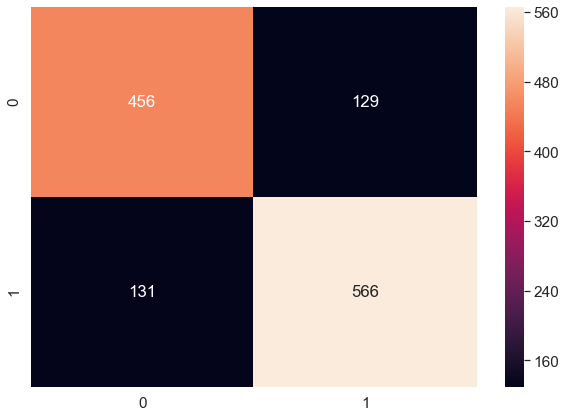

In [92]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


In [93]:

#### End of Model ####
users = dataset3['Employee_Id']

# Formatting Final Results

final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['Employee_Id', 'Employee_Status', 'predictions']]

In [94]:
final_results

,Employee_Id,Employee_Status,predictions
2,230,0.0,0
6,387,0.0,0
7,585,1.0,1
14,1336,0.0,0
18,1733,0.0,1
19,1814,0.0,1
21,1971,0.0,1
27,2143,0.0,0
28,2217,1.0,0
36,2885,0.0,0


In [95]:
from sklearn.metrics import roc_auc_score

In [96]:
roc_auc_score(y_test, y_pred)

0.7957694147077217

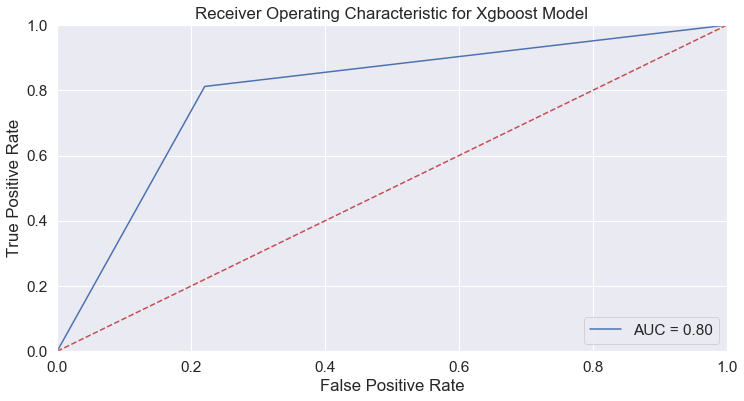

In [97]:
plt.figure(figsize=(12,6))

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Xgboost Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
